In [1]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from datetime import time, datetime
import sqlite3

In [2]:
data_dir = './data'

In [3]:
reddit_db = sqlite3.connect(data_dir + '/reddit/reddit.db')

# Explorative Analysis

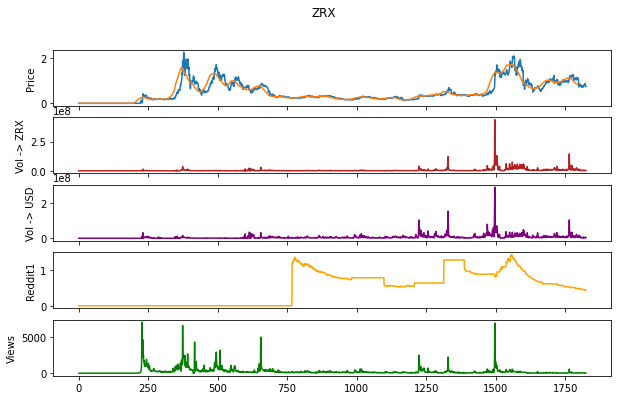

In [4]:
def analyze(symbol: str):
    # get name
    name = None
    coins1_dict = pd.read_json(data_dir + '/coin.json', typ='dictionary')
    if symbol in coins1_dict.keys():
        name = coins1_dict[symbol]
    else:
        with open(data_dir + '/coin_info.json', 'r') as f:
            coins2_dict = json.load(f)
        if symbol in coins2_dict.keys():
            name = coins2_dict[symbol]['CoinName']
        else:
            name = None

    # load data + manipulation
    period = 30
    dateparser = lambda x: datetime.fromtimestamp(int(x))
    df_price = pd.read_csv(data_dir + f'/price_histories/{symbol}.csv', index_col=[0], parse_dates=['time'], date_parser=dateparser, usecols=['time', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto'])
    vol_to = df_price['volumeto'].values
    vol_from = df_price['volumefrom'].values
    vol_to_conv = np.convolve(vol_to, np.ones(period)/period, mode='valid')
    vol_from_conv = np.convolve(vol_from, np.ones(period)/period, mode='valid')
    price = df_price['low'].values
    price_conv = np.convolve(price, np.ones(period)/period, mode='valid')

    df_social = pd.read_csv(data_dir + f'/social_stats/{symbol}.csv', index_col=[0], parse_dates=['time'], date_parser=dateparser)
    reddit1 = df_social['reddit_posts_per_day']
    page_views = df_social['total_page_views'].diff()

    reddit_cursor = reddit_db.cursor()
    reddit_cursor.execute(f"SELECT Id, Mentions FROM data WHERE Id LIKE '%-{name}'")
    reddit2 = reddit_cursor.fetchall()

    # plots
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, figsize=(10,6))
    fig.suptitle(symbol)
    ax1.set_ylabel('Price')
    ax1.plot(price)
    ax1.plot(price_conv)
    ax2.set_ylabel(f'Vol -> {symbol}')
    ax2.plot(vol_to, color='firebrick')
    #ax2.plot(vol_to_conv)
    ax3.set_ylabel(f'Vol -> USD')
    ax3.plot(vol_from, color='purple')
    #ax3.plot(vol_from_conv)
    ax4.set_ylabel('Reddit1')
    ax4.plot(reddit1, color='orange')
    ax5.set_ylabel('Views')
    ax5.plot(page_views, color='green')

analyze('ZRX')

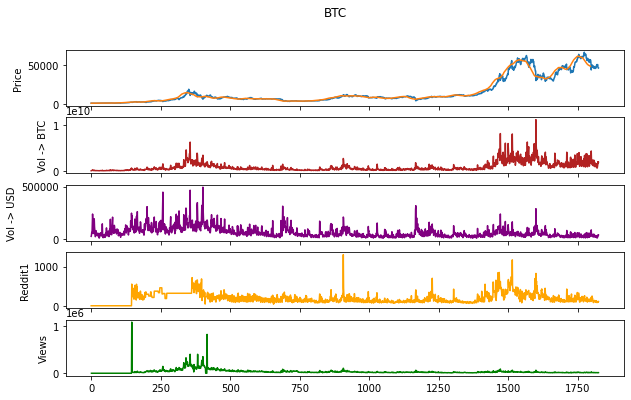

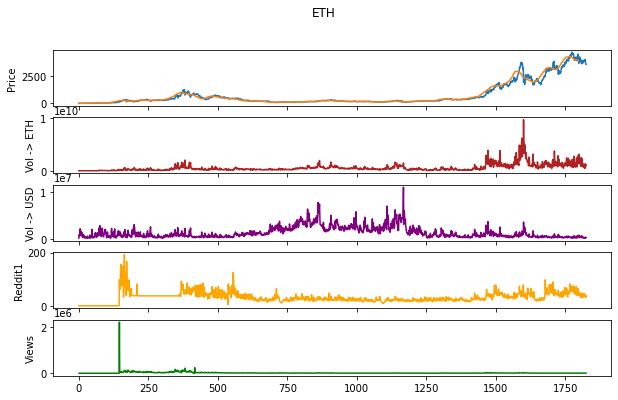

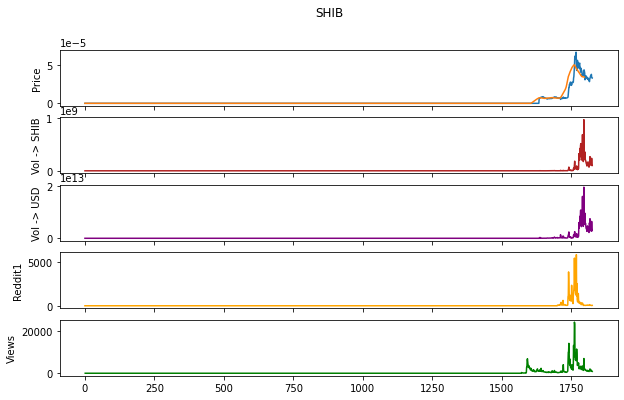

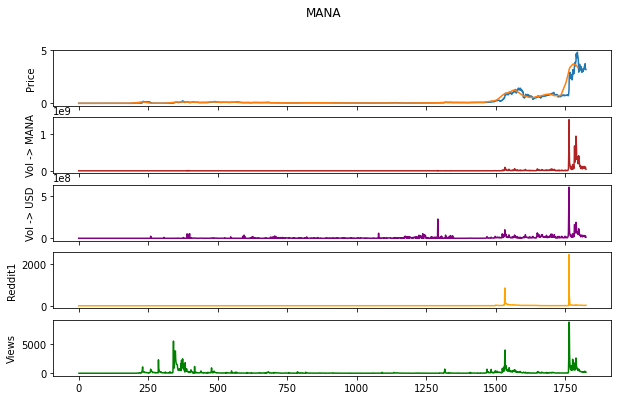

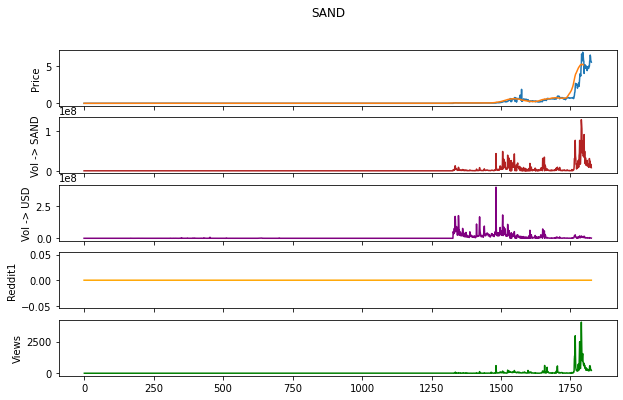

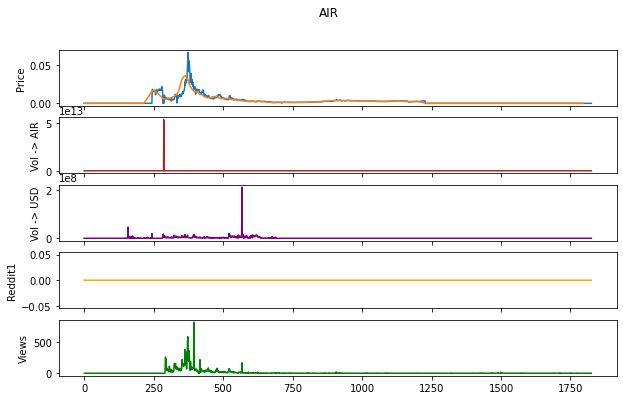

In [5]:
analyze('BTC')
analyze('ETH')
analyze('SHIB')
analyze('MANA')
analyze('SAND')
analyze('AIR')

In [6]:
def classify_breakouts(data):
    print('TODO')

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

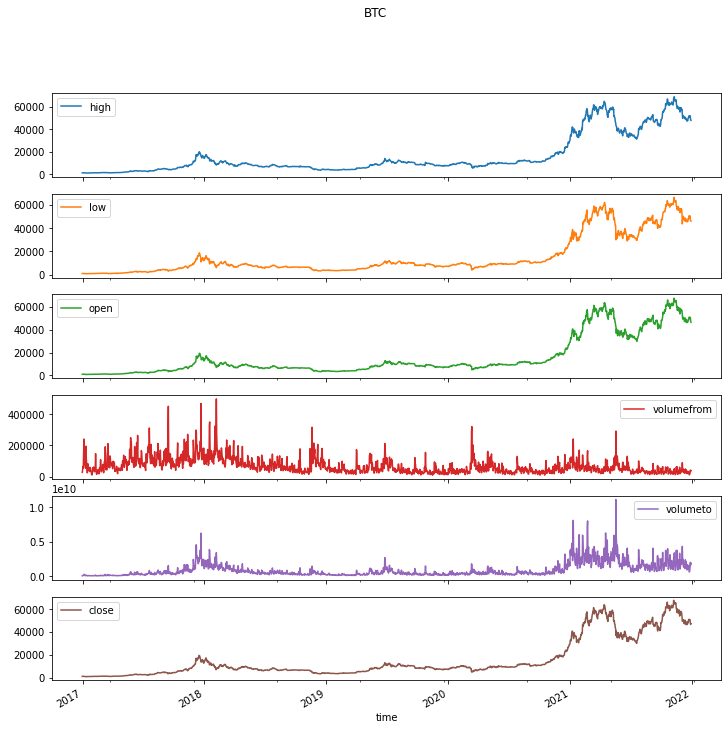

In [7]:
dateparser = lambda x: datetime.fromtimestamp(int(x))
df = pd.read_csv('./data/price_histories/BTC.csv', index_col=[0], parse_dates=['time'], date_parser=dateparser, usecols=['time', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto'])
df.plot(title='BTC', subplots=True, figsize=(12,12))

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2016-12-31 01:00:00,965.47,942.40,959.04,27559.31,2.637940e+07,963.38
2017-01-01 01:00:00,1001.61,956.10,963.38,41148.52,4.057092e+07,995.44
2017-01-02 01:00:00,1031.68,990.20,995.44,64951.63,6.603807e+07,1017.05
2017-01-03 01:00:00,1035.47,1006.53,1017.05,54788.01,5.608587e+07,1033.30
2017-01-04 01:00:00,1148.54,1022.32,1033.30,156272.17,1.705846e+08,1135.41
...,...,...,...,...,...,...
2021-12-26 01:00:00,51283.70,49485.62,50431.63,14663.26,7.366178e+08,50790.88
2021-12-27 01:00:00,52079.46,50481.26,50790.88,21873.37,1.120188e+09,50714.73
2021-12-28 01:00:00,50718.53,47317.78,50714.73,40699.40,1.985905e+09,47536.39


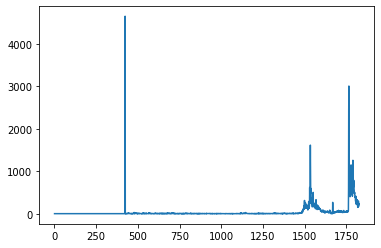

In [8]:
df_MANA = pd.read_csv('./data/social_stats/MANA.csv')
plt.plot(df_MANA['reddit_subscribers'].diff())
#df.plot(x='time', y='trades_page_views')
df

In [9]:
with open(data_dir + '/coin_info.json', 'r') as f:
    data = json.load(f)

df_coin_info = pd.DataFrame.from_dict(data, orient='index', columns=['CoinName'])
df_coin_info
#coins2_dict = pd.read_json(data_dir + f'/coin_info.json')#, typ='dictionary')

,CoinName
$ANRX,AnRKey X
$BASED,Based Money
$KIRBYRELOADED,Kirby Reloaded
$MAID,MaidCoin
$ROPE,Rope
...,...
gOHM,Governance OHM
pBTC35A,pBTC35A
redBUX,redBUX
sOHM,Staked Olympus


/Users/lucasaschenbach/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


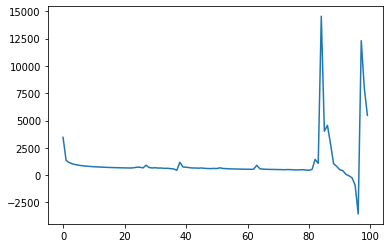

In [30]:
import scipy.fftpack as fft

#plt.plot(df_MANA['reddit_comments_per_day'].tolist())
MANA_ft = fft.fft(df_MANA['reddit_comments_per_day'].tolist())
plt.plot(fft.ifft(MANA_ft[0:100]))
